# Visualize training curves 🍑

In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 500
mpl.rcParams['figure.figsize'] = [7, 5]
mpl.rcParams['savefig.pad_inches'] = 0

## Pretraining curves

In [4]:
def plot_pretrain(system):

    train_loss, val_loss, epochs = [], [], []
    plt.style.use("ggplot")

    with open(system + '/log.txt', 'r') as file:
        for line in file:
            data = eval(line)
            train_loss.append(data['train_loss'])
            val_loss.append(data['val_loss'])
            epochs.append(data['epoch'])

    with open(system + '/config.txt', 'r') as file:
        for line in file:
            if line.startswith("Training time:"):
                runtime = line.strip().split(" ")[-1]

    
    plt.plot(epochs, train_loss, color="royalblue", label=f'Train (last {train_loss[-1]:.3f})', linewidth=2.5)
    plt.plot(epochs, val_loss, color="lightseagreen", label=f'Validation (last {val_loss[-1]:.3f})', linewidth=2.5)
    plt.scatter(epochs, train_loss, color="royalblue")
    plt.scatter(epochs, val_loss, color="lightseagreen")
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.tick_params(left=False, right=False)
    plt.legend(fontsize=13, fancybox=True, borderpad=0.8, labelspacing=0.8, borderaxespad=1.8, framealpha=0.7, facecolor='white')
    
    print(f"Last Validation Loss: {val_loss[-1]:.5f}")
    print(f"Last Train Loss: {train_loss[-1]:.5f}")
    print(f"Train time: {runtime}")

    plt.show()

Last Validation Loss: 0.05183
Last Train Loss: 0.05182
Train time: 6:04:22


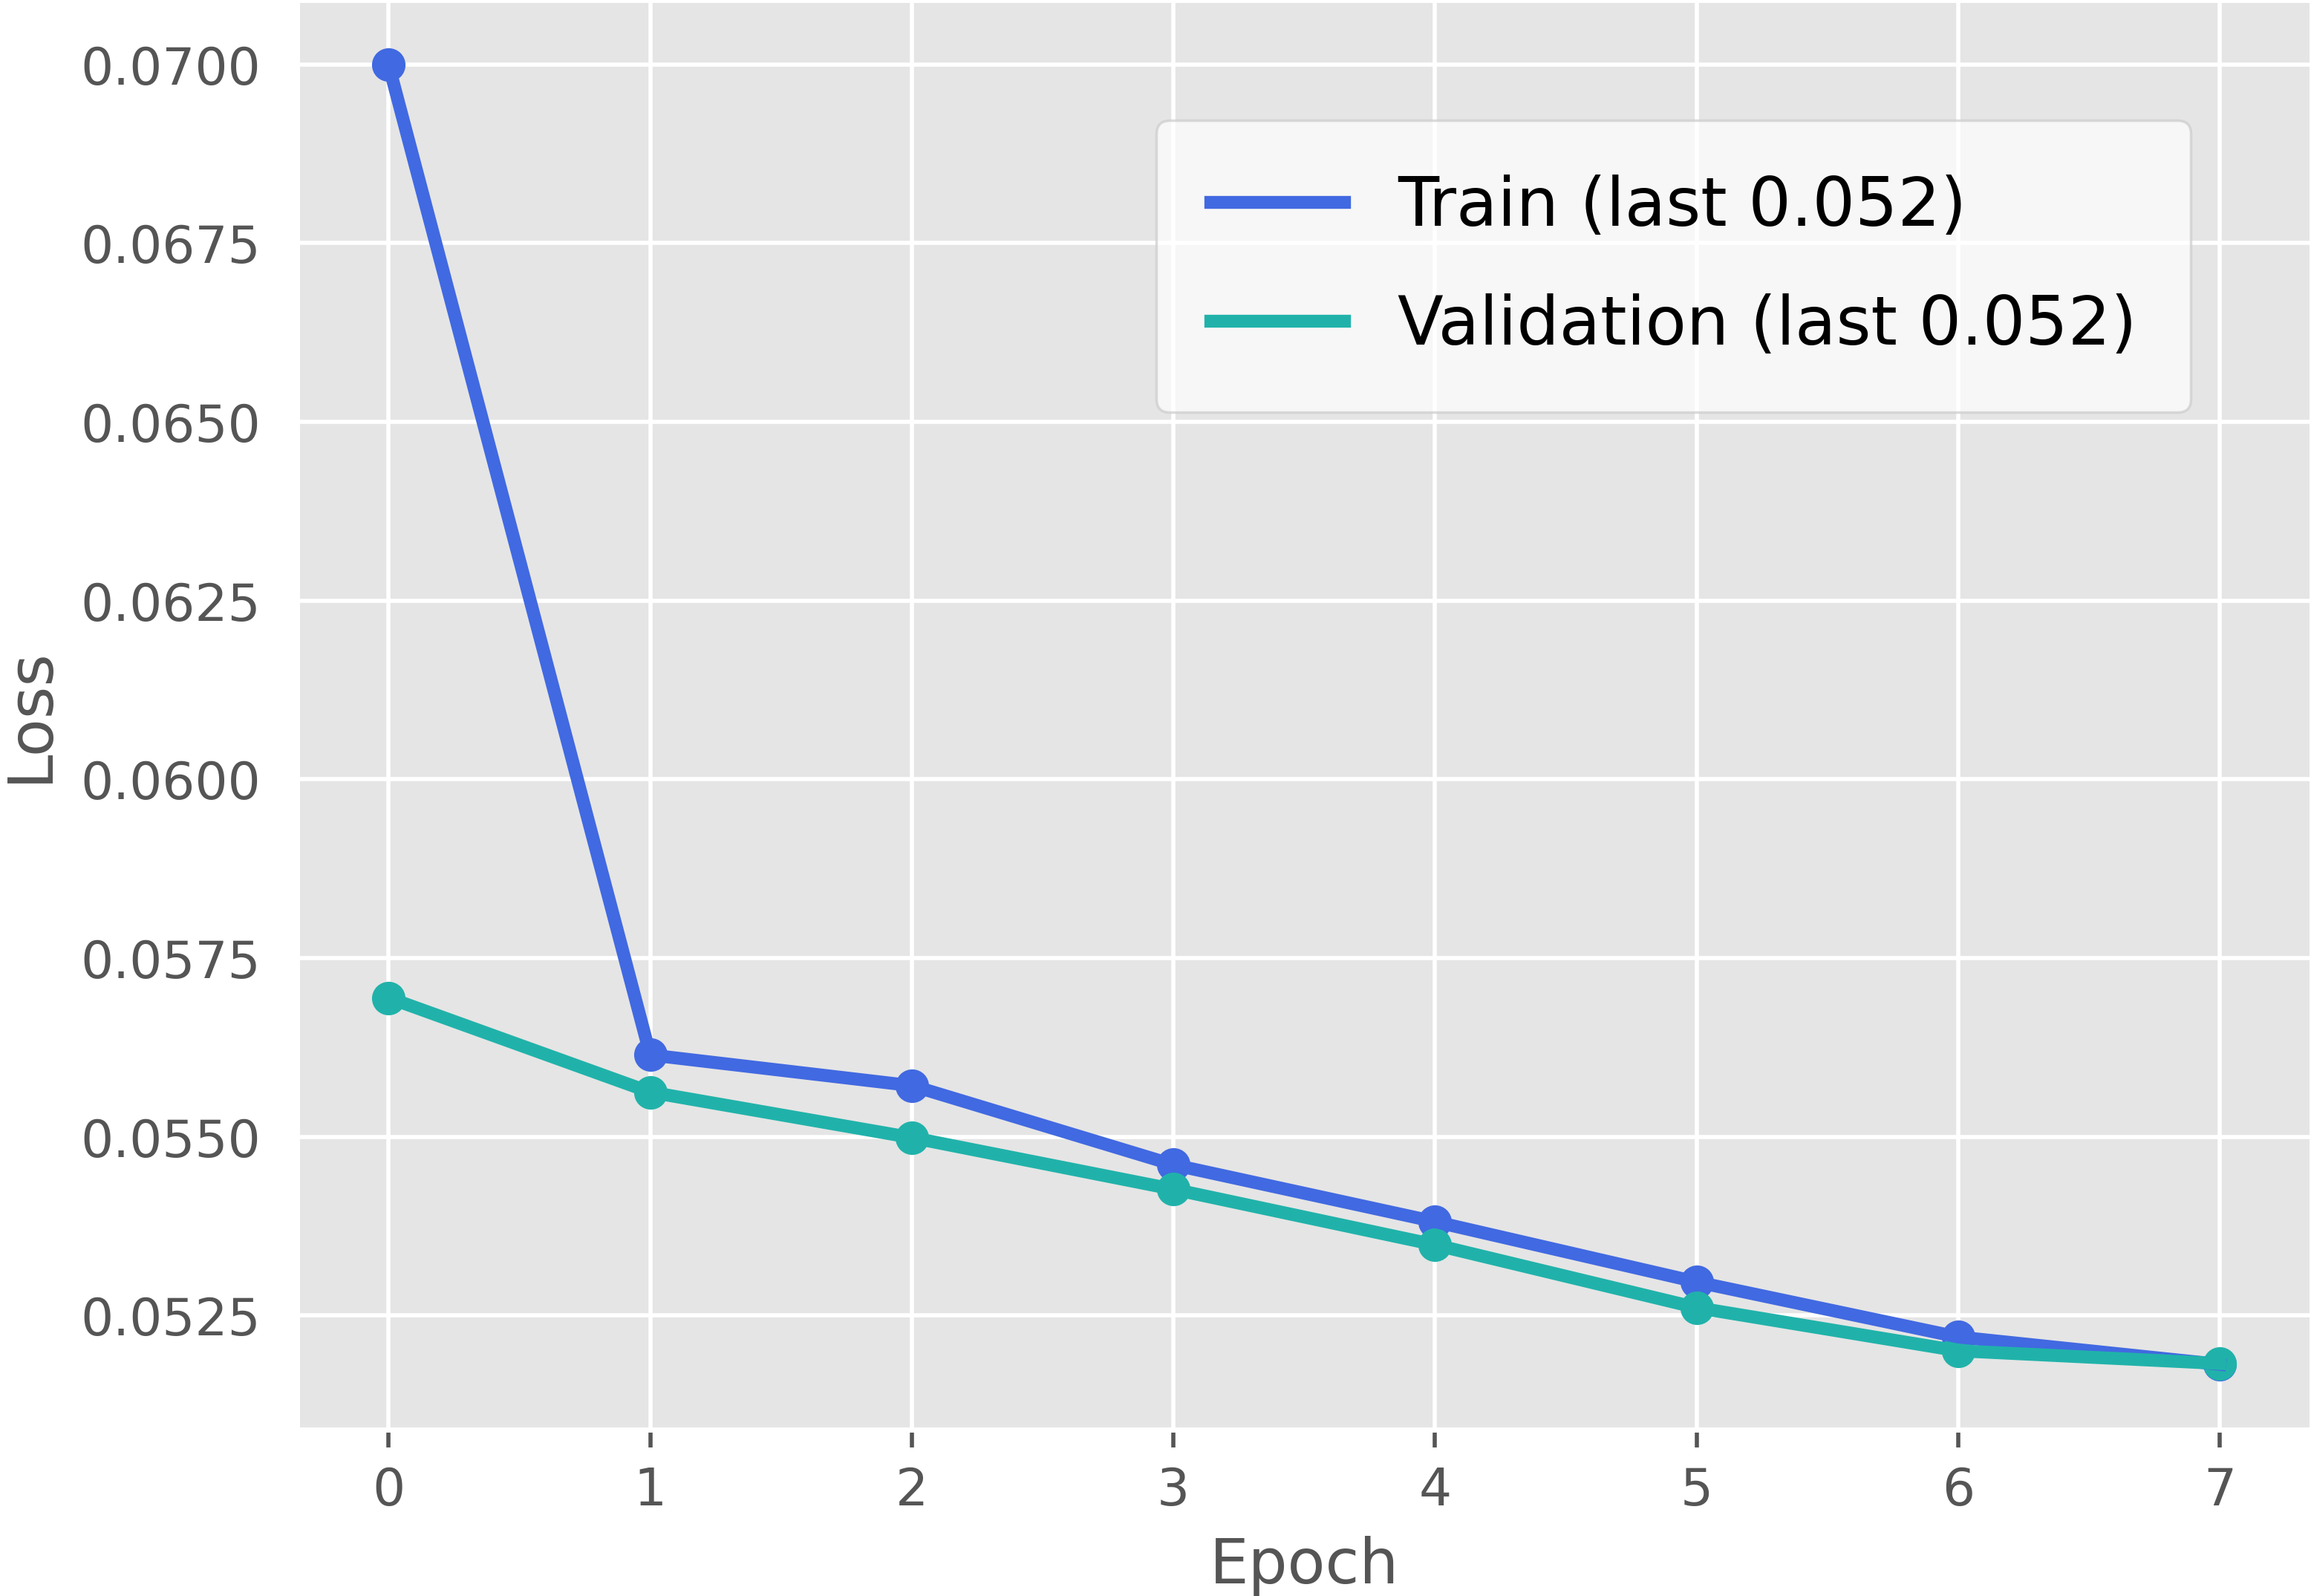

In [41]:
plot_pretrain('pretrain25')

## Training curves

In [26]:
def plot_train(system):

    plt.style.use("ggplot")
    train_loss, val_loss, epochs = [], [], []
    val_acc1, val_acc5 = [], []

    with open(system + '/log.txt', 'r') as file:
        for line in file:
            data = eval(line)
            train_loss.append(data['train_loss'])
            val_loss.append(data['val_loss'])
            epochs.append(data['epoch'])
            val_acc1.append(data['val_acc1'])
            val_acc5.append(data['val_acc5'])

    with open(system + '/config.txt', 'r') as file:
        for line in file:
            if line.startswith("Training time:"):
                runtime = line.strip().split(" ")[-1]
    
    plt.plot(epochs, train_loss, color="royalblue", label=f'Train (last {train_loss[-1]:.3f})', linewidth=2.5)
    plt.plot(epochs, val_loss, color="lightseagreen", label=f'Validation (last {val_loss[-1]:.3f})', linewidth=2.5)
    plt.scatter(epochs, train_loss, color="royalblue")
    plt.scatter(epochs, val_loss, color="lightseagreen")
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.tick_params(left=False, right=False)
    plt.legend(fontsize=13, fancybox=True, borderpad=0.8, labelspacing=0.8, borderaxespad=1.8, framealpha=0.7, facecolor='white')
    
    print(f"Last Validation Loss: {val_loss[-1]:.5f}")
    print(f"Last Train Loss: {train_loss[-1]:.5f}")
    print(f"Train time: {runtime}")
    print(f"Last Validation Acc@1: {val_acc1[-1]:.3f}")
    print(f"Last Validation Acc@5: {val_acc5[-1]:.3f}")

    plt.show()

Last Validation Loss: 1.66169
Last Train Loss: 1.63070
Train time: 0:06:22
Last Validation Acc@1: 42.495
Last Validation Acc@5: 88.339


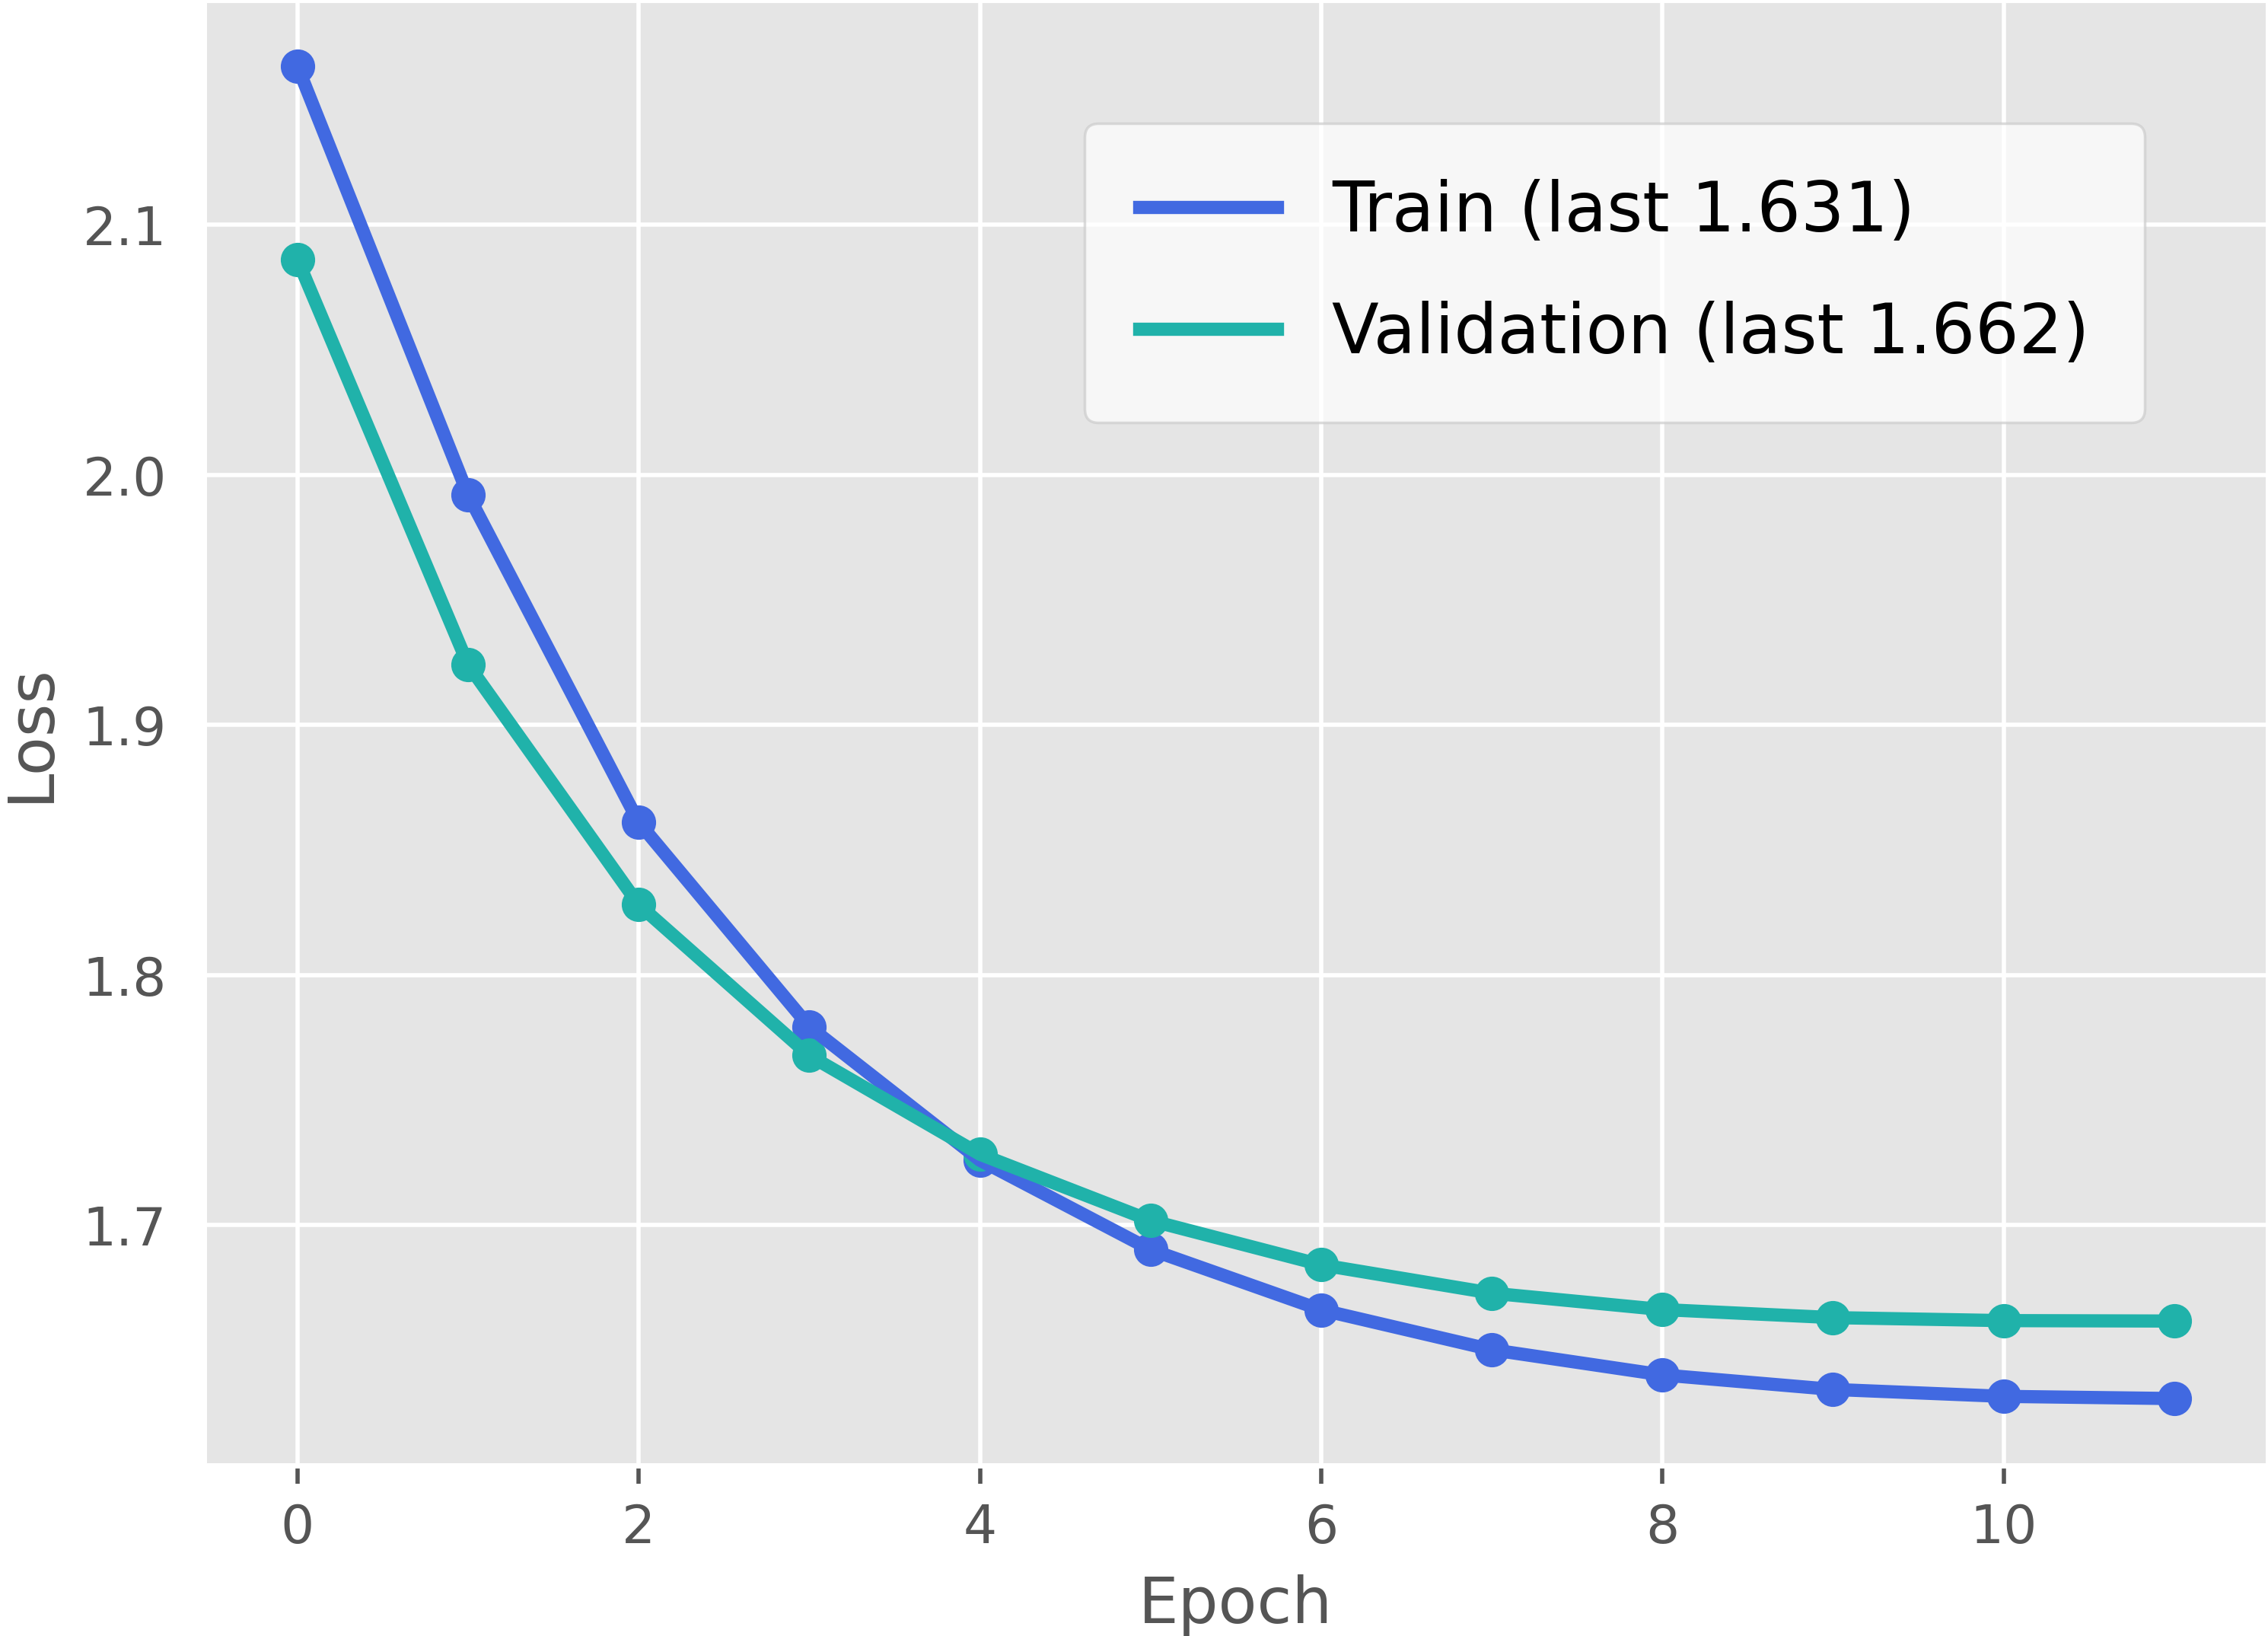

In [42]:
plot_train("probe25_class9")